## ЗАДАЧА

Убедимся в том, что всё так происходит на самом деле. Скачайте тренировочный датасэт с ирисами, 
обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. 
При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, 
и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и 
аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

In [30]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [3]:
train_iris = pd.read_csv('data/train_iris.csv')
X_train_iris = train_iris[['sepal length', 'sepal length', 'petal length', 'petal length']]
y_train_iris = train_iris.species
X_train_iris.head()

,sepal length,sepal length,petal length,petal length
0,7.4,7.4,6.1,6.1
1,5.0,5.0,1.5,1.5
2,4.8,4.8,1.6,1.6
3,5.8,5.8,5.1,5.1
4,7.2,7.2,6.1,6.1


In [4]:
test_iris = pd.read_csv('data/test_iris.csv')
X_test_iris = test_iris[['sepal length', 'sepal length', 'petal length', 'petal length']]
y_test_iris = test_iris.species
X_test_iris.head()

,sepal length,sepal length,petal length,petal length
0,5.8,5.8,5.1,5.1
1,5.9,5.9,4.8,4.8
2,6.0,6.0,4.8,4.8
3,5.2,5.2,3.9,3.9
4,5.1,5.1,1.9,1.9


In [5]:
np.random.seed(0)
max_depth_value = range(1, 100)
score_data = pd.DataFrame()
for max_depth in max_depth_value:
    
    iris_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    iris_clf.fit(X_train_iris, y_train_iris)
    train_score = iris_clf.score(X_train_iris, y_train_iris)
    test_score = iris_clf.score(X_test_iris, y_test_iris)
    
    mean_cross_val_score = cross_val_score(iris_clf, X_test_iris, y_test_iris, cv=5).mean()
        
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score], 
                                    'cross_val_score': [mean_cross_val_score]})
    score_data = score_data.append(temp_score_data)
score_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.70,0.60,0.70
0,2,0.97,0.92,0.94
0,3,0.97,0.92,0.92
0,4,0.99,0.94,0.94
0,5,0.99,0.94,0.92


In [6]:
score_data_long = pd.melt(score_data, 
                          id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.97
3,4,train_score,0.99
4,5,train_score,0.99


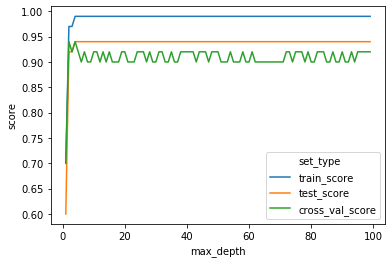

In [7]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=score_data_long)

## ЗАДАЧА

Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! 
Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт 
из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.

In [8]:
dog_train = pd.read_csv('data/dogs_n_cats.csv')
X_dog_train = dog_train[['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]
y_dog_train = dog_train[['Вид']]
X_dog_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


[Text(167.4, 163.07999999999998, 'X[1] <= 11.8\nentropy = 1.0\nsamples = 1000\nvalue = [500, 500]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 500\nvalue = [500, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 500\nvalue = [0, 500]')]

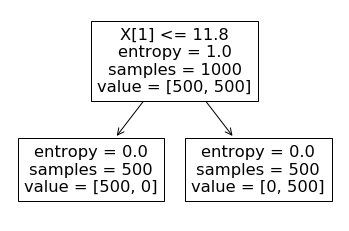

In [9]:
dog_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
dog_clf.fit(X_dog_train, y_dog_train)

tree.plot_tree(dog_clf)

In [10]:
dog_test = pd.read_json('data/dataset_209691_15.txt')
dog_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,31,37.2,1,0,0
1,22,26.4,1,1,0
2,18,21.6,1,1,0
3,18,21.6,1,1,0
4,33,39.6,1,1,0


In [11]:
res = dog_clf.predict(dog_test)
len(res[res=='собачка'])

57

## ЗАДАЧА

Скачайте набор данных с тремя переменными: sex, exang, num. 
Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет 
у пациента заболевание сердца (переменная num), основываясь на двух признаках: 
пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, 
используйте entropy в качестве критерия.

 

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет 
помещена в корень дерева.

In [12]:
train_data = pd.read_csv('data/train_data_tree.csv')
train_data.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [13]:
X_train = train_data[['sex', 'exang']]
X_train.head()

,sex,exang
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0


In [14]:
y_train = train_data.num
y_train.head()

0    1
1    1
2    1
3    0
4    1
Name: num, dtype: int64

In [15]:
clf_data = tree.DecisionTreeClassifier(criterion='entropy')
clf_data.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 181.2, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

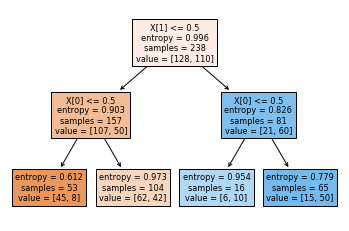

In [16]:
tree.plot_tree(clf_data, filled=True)

## ЗАДАЧА

Для начала опробуем наше дерево на классическом наборе iris, где собраны данные о длине, 
ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. 
Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. 
Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 
75% и 25% соответственно.
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, 
а после предскажите классы, к которым принадлежат данные из тестовой выборки, 
сохраните результат предсказаний в переменную predicted.

In [21]:
iris = load_iris()
X = iris.data
y = iris.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [23]:
clf_iris = tree.DecisionTreeClassifier()
clf_iris.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
predicted = clf_iris.predict(X_test)
predicted

array([0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1,
       2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0])

## ЗАДАЧА

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [25]:
iris = load_iris()
X = iris.data
y = iris.target

In [27]:
parameters = {'max_depth': range(1, 30), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10)}
iris_clf = tree.DecisionTreeClassifier()
search = GridSearchCV(iris_clf, parameters)
search.fit(X, y)
best_tree = search.best_estimator_

## ЗАДАЧА

Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [29]:
parameters = {'max_depth': range(1, 30), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10)}
iris_clf = tree.DecisionTreeClassifier()
search = RandomizedSearchCV(iris_clf, parameters)
search.fit(X, y)
best_tree = search.best_estimator_
